# Machinelearning Labb

*by Hannes*

## 0. Imports

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

## 1.1 Movielens EDA

In [108]:
# Paths to the Data
movies_df = pd.read_csv('Data/movies.csv')
ratings_df = pd.read_csv('Data/ratings.csv')

### 1.1.1 EDA Movies

In [109]:
movies_df.sample(5)

,movieId,title,genres
8974,26751,Rubin and Ed (1991),Comedy|Drama
38742,154646,Slow Action (2010),Sci-Fi
64029,208957,Extracurricular (2018),Horror|Thriller
569,576,Fausto (1993),Comedy
11990,56432,"Swimming Pool, The (La piscine) (1969)",Crime|Drama


In [110]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [111]:
movies_df.tail()

,movieId,title,genres
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary


In [112]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [113]:
movies_df.shape

(86537, 3)

In [114]:
movies_df.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [115]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [116]:
movies_df.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [117]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [118]:
movies_df.nunique()

movieId    86537
title      86330
genres      1796
dtype: int64

### 1.1.2 EDA Ratings

In [119]:
ratings_df.sample(5)

,userId,movieId,rating,timestamp
26909057,262716,26694,3.0,1547989793
8771341,85997,72226,4.5,1350245178
22929942,223510,1247,1.0,1013487900
18452433,180752,3285,3.0,1331975493
13738034,134928,6350,4.5,1621709179


In [120]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [121]:
ratings_df.tail()

,userId,movieId,rating,timestamp
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765
33832161,330975,8783,2.5,1091581799


In [122]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [123]:
ratings_df.shape

(33832162, 4)

In [124]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


In [125]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [126]:
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [127]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [128]:
ratings_df.nunique()

userId         330975
movieId         83239
rating             10
timestamp    27419646
dtype: int64

### 1.1.3 Q:A

#### A) Top 10 movies with most amount of ratings

#### B) Calculate the avrage rating for the 10 movies with most ratings

In [129]:
# Count the number of ratings for each movie
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# Merge with movies_df to get movie titles
movies_with_ratings_count = pd.merge(movies_df, ratings_count, on='movieId')

# Sort movies by the number of ratings in descending order and get the top 10
top_movies = movies_with_ratings_count.sort_values('count', ascending=False).head(10)

# Calculate the average rating for the top movies and round to one decimal place
average_ratings = ratings_df[ratings_df['movieId'].isin(top_movies['movieId'])] \
                    .groupby('movieId')['rating'].mean().round(1).reset_index()

# Add the average ratings to the top_movies DataFrame
top_movies_with_avg_ratings = pd.merge(top_movies, average_ratings, on='movieId')

# Reset the index to start from 1 for display purposes and rename columns for presentation
top_movies_with_avg_ratings.reset_index(drop=True, inplace=True)
top_movies_with_avg_ratings['count'] = top_movies_with_avg_ratings['count'].apply(lambda x: "{:,}".format(x))
top_movies_with_avg_ratings.rename(columns={'title': 'Movie Title', 'count': 'Rating Count', 'rating': 'Average Rating'}, inplace=True)
top_movies_with_avg_ratings.index += 1  # Adjust index to start from 1

# Generate the Markdown table
markdown_table = "| Rank | Movie Title | Rating Count | Average Rating |\n"
markdown_table += "|------|-------------|--------------|----------------|\n"

# Fill the table with data from the DataFrame
for index, row in top_movies_with_avg_ratings.iterrows():
    markdown_table += f"| {index} | {row['Movie Title']} | {row['Rating Count']} | {row['Average Rating']} |\n"

# Display the Markdown table in Jupyter Notebook
display(Markdown(markdown_table))


| Rank | Movie Title | Rating Count | Average Rating |
|------|-------------|--------------|----------------|
| 1 | Shawshank Redemption, The (1994) | 122,296 | 4.4 |
| 2 | Forrest Gump (1994) | 113,581 | 4.1 |
| 3 | Pulp Fiction (1994) | 108,756 | 4.2 |
| 4 | Matrix, The (1999) | 107,056 | 4.2 |
| 5 | Silence of the Lambs, The (1991) | 101,802 | 4.2 |
| 6 | Star Wars: Episode IV - A New Hope (1977) | 97,202 | 4.1 |
| 7 | Fight Club (1999) | 86,207 | 4.2 |
| 8 | Schindler's List (1993) | 84,232 | 4.2 |
| 9 | Jurassic Park (1993) | 83,026 | 3.7 |
| 10 | Star Wars: Episode V - The Empire Strikes Back (1980) | 80,200 | 4.1 |


#### C) Plot the years and number of movies represented in the dataset

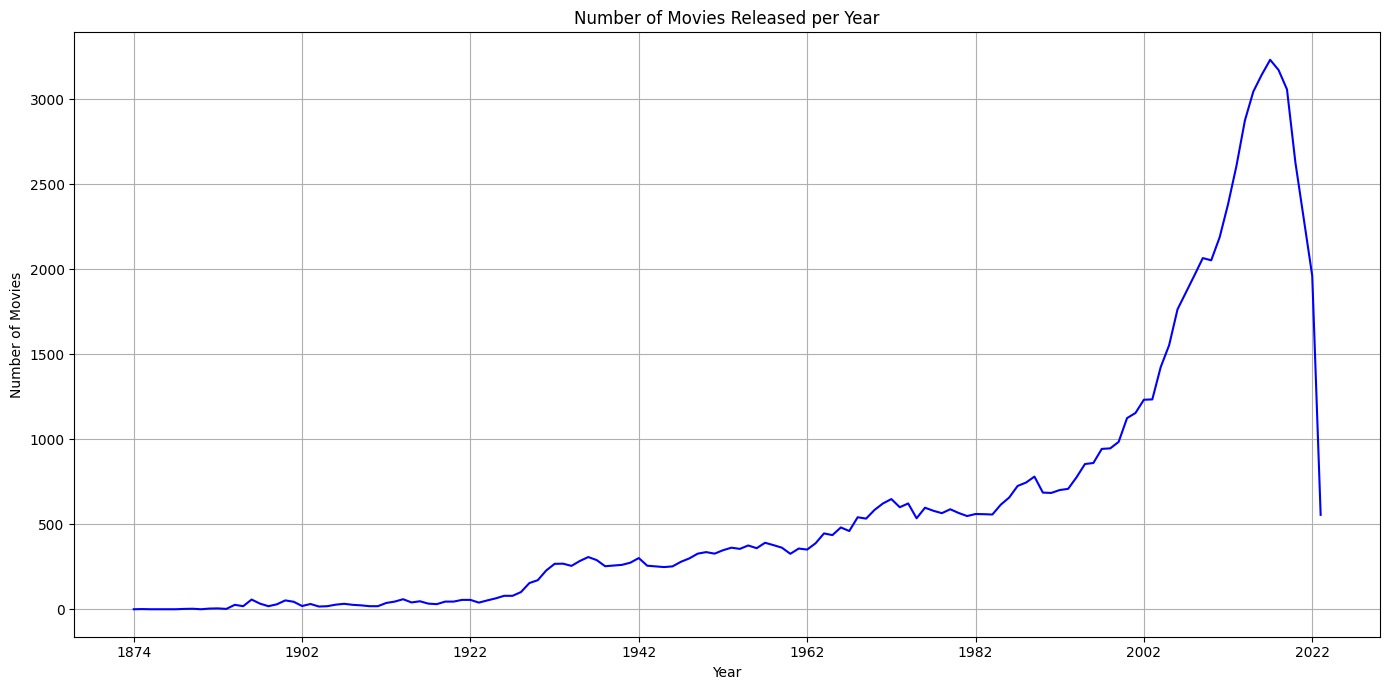

In [130]:
plt.figure(figsize=(14, 7))  # Larger figure size for better visibility
movies_per_year.plot(kind='line', color='blue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=360)  # Rotate the x-axis labels to be vertical
plt.grid(True)  # Optional: adds a grid for better readability
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()


#### D) Make a plot of the number of ratings against movieId

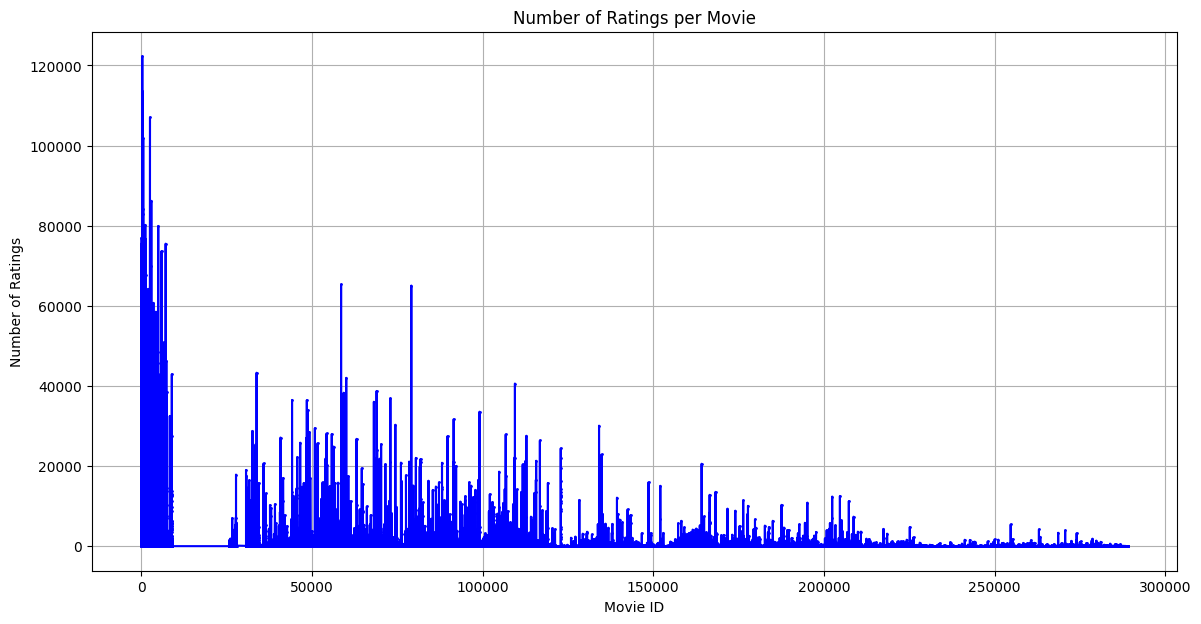

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming ratings_df is your DataFrame containing ratings data

# Group by 'movieId' and count the number of ratings for each movie
ratings_per_movie = ratings_df.groupby('movieId').size()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(ratings_per_movie.index, ratings_per_movie.values, 'b-', marker='.', markersize=2)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


#### E) Calculate average ratings for the top 10 movies with the most ratings. Make a bar graph of these

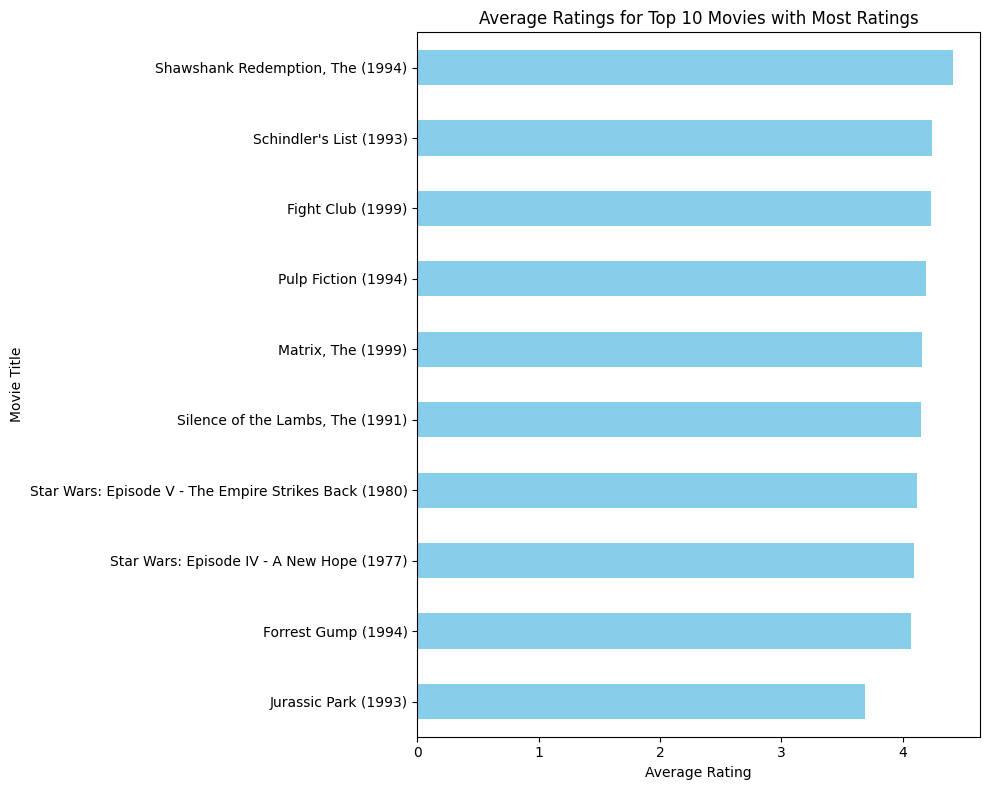

In [132]:
# Merge the Movies and Ratings dataframes on the movie ID
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Count the number of ratings for each movie and find the top 10 movies with the most ratings
ratings_count = merged_df.groupby('movieId').size().sort_values(ascending=False).head(10)

# Filter the merged dataframe to only include the top 10 movies
top_movies_df = merged_df[merged_df['movieId'].isin(ratings_count.index)]

# Calculate the average rating for each of the top 10 movies
avg_ratings = top_movies_df.groupby('title')['rating'].mean().sort_values(ascending=True)

# Plotting the average ratings in a bar chart
plt.figure(figsize=(10, 8))
avg_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Ratings for Top 10 Movies with Most Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

## 1.2 Sparse matrix

In [133]:
from scipy.sparse import csc_matrix
import numpy as np

# Step 1: Filtering
# Adjust these thresholds based on your dataset and computational resources
min_ratings_per_movie = 10
min_ratings_per_user = 5

# Filtering movies
movie_counts = ratings_df['movieId'].value_counts()
movies_filtered = movie_counts.index[movie_counts >= min_ratings_per_movie]

# Filtering users
user_counts = ratings_df['userId'].value_counts()
users_filtered = user_counts.index[user_counts >= min_ratings_per_user]

# Apply filtering
filtered_ratings = ratings_df[(ratings_df['movieId'].isin(movies_filtered)) & (ratings_df['userId'].isin(users_filtered))]

# Step 2: Preparing data for sparse matrix
# Ensure movieId and userId are categorical for efficient storage
# Before modifying the filtered DataFrame, explicitly create a copy to work with
filtered_ratings = filtered_ratings.copy()

# Now safely convert 'movieId' and 'userId' to categorical types without warnings
filtered_ratings['movieId'] = filtered_ratings['movieId'].astype("category")
filtered_ratings['userId'] = filtered_ratings['userId'].astype("category")

# Continue with creating the sparse matrix as before
movie_indices = filtered_ratings['movieId'].cat.codes
user_indices = filtered_ratings['userId'].cat.codes
sparse_matrix = csc_matrix((filtered_ratings['rating'].values, (movie_indices, user_indices)), 
                           shape=(filtered_ratings['movieId'].cat.categories.size, filtered_ratings['userId'].cat.categories.size))

print(f"Sparse Matrix Shape: {sparse_matrix.shape}")
print(f"Number of Non-Zero Elements: {sparse_matrix.nnz}")

Sparse Matrix Shape: (32021, 307411)
Number of Non-Zero Elements: 33625087


This filtering choice targetets movie popularity and user activity. By selecting movies with a minimum number of ratings and users who have engaged with a minimum number of movies, we can focus on the most informative interactions. This not only aids in managing computational resources more effectively but also enhances the potential accuracy and relevance of any resulting recommendation models by concentrating on the core, active part of the dataset.

## 1.3 Recommending system

### Overview of Steps:

1. **Pre-Processing**: Ensure the data is suitable for a KNN model. This includes using the sparse matrix created earlier as the input data.
2. **Model Fitting**: Use the `NearestNeighbors` class from `sklearn.neighbors` to fit the model based on the sparse matrix.
3. **User Query**: Process user input to find the user's closest neighbors in the dataset.
4. **Recommendation Logic**: Identify the top 5 recommended movies based on the similarity scores from the KNN model.

In [134]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

# Initialize and fit the KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(sparse_matrix)

def get_movie_indices_from_query(search_query, movies_df):
    """
    Searches movies_df for titles containing the search query and returns their indices.
    
    :param search_query: String, the user's search query for movie titles.
    :param movies_df: DataFrame, containing movie information.
    :return: List of integers, indices of matching movies in movies_df.
    """
    # Find movies matching the search query
    matching_movies = movies_df[movies_df['title'].str.contains(search_query, case=False, na=False)]
    return matching_movies.index.tolist()

# User input example
search_query = "Batman"

# Retrieve indices of movies matching the user's query
movie_indices = get_movie_indices_from_query(search_query, movies_df)

if movie_indices:
    # Ensure indices are within the range of the sparse matrix
    valid_indices = [i for i in movie_indices if i < sparse_matrix.shape[0]]
    
    if valid_indices:
        # Compute the mean vector for the selected movies as the query vector
        query_vector = sparse_matrix[valid_indices].mean(axis=0).A  # Convert to dense array if needed
        query_vector_np = np.asarray(query_vector)  # Ensure query_vector is in NumPy array format
        
        # Perform the KNN query
        distances, indices = model_knn.kneighbors(query_vector_np, n_neighbors=6)
        
        # Translate indices back to movie titles, skipping the first index as it's the query itself
        recommended_movie_ids = [movies_df.iloc[idx]['movieId'] for idx in indices.flatten()[1:6]]
        recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]['title'].tolist()
        
        # Print the top 5 recommended movies in a more readable format
        print("Top 5 recommended movies based on your interest in \"{}\":\n".format(search_query))
        for i, movie_title in enumerate(recommended_movies, 1):
            print("{}. {}".format(i, movie_title))
    else:
        print("No valid movie indices found for the query.")
else:
    print("No movies found matching the query.")


Top 5 recommended movies based on your interest in "Batman":

1. Batman Forever (1995)
2. Die Hard: With a Vengeance (1995)
3. Ace Ventura: Pet Detective (1994)
4. True Lies (1994)
5. Dances with Wolves (1990)


### 1.3.1 Recommending systems overview

Recommender systems are algorithms designed to suggest relevant items to users, based on their preferences or past interactions. They are widely used in various online platforms such as e-commerce websites, streaming services, and social media platforms to enhance user experience and engagement.

There are several types of recommender systems, including:

1. **Collaborative Filtering**: This approach recommends items by leveraging the preferences or behavior of similar users. It can be further categorized into user-based collaborative filtering, which recommends items based on the preferences of similar users, and item-based collaborative filtering, which recommends items similar to those the user has interacted with in the past.

2. **Content-Based Filtering**: This approach recommends items based on their attributes or features, such as genre, keywords, or metadata. It analyzes the content of items and matches them to the user's preferences.

3. **Hybrid Recommender Systems**: These systems combine multiple recommendation techniques, such as collaborative filtering and content-based filtering, to provide more accurate and personalized recommendations.

Recommender systems typically involves the following steps:

1. **Data Collection**: Relevant data about users, items, and their interactions are collected and stored in a database. This data may include user ratings, item attributes, purchase history, etc.

2. **Data Preprocessing**: The collected data is processed and transformed into a suitable format for analysis. This may involve cleaning the data, handling missing values, and encoding categorical variables.

3. **Model Training**: Depending on the chosen approach a recommender system model is trained using the preprocessed data. For content-based filtering, it may involve building a model to predict user preferences based on item attributes.

4. **Recommendation Generation**: Once the model is trained, it can generate recommendations for users based on their preferences or behavior. These recommendations are typically ranked based on relevance and presented to the user through a user interface.

It's important to note that recommender systems can be further customized and optimized based on specific use cases and business objectives.

Sources:
- Resnick, P., & Varian, H. R. (1997). "Recommender systems." Communications of the ACM, 40(3), 56-58.
- Adomavicius, G., & Tuzhilin, A. (2005). "Toward the next generation of recommender systems: A survey of the state-of-the-art and possible extensions." IEEE Transactions on Knowledge and Data Engineering, 17(6), 734-749.